In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('ex1data2.txt', sep=' ', header=None)
df.columns=['x1', 'x2', 'y']
df

,x1,x2,y
0,2.104,3,3.99900
1,1.600,3,3.29900
2,2.400,3,3.69000
3,1.416,2,2.32000
4,3.000,4,5.39900
5,1.985,4,2.99900
6,1.534,3,3.14900
7,1.427,3,1.98999
8,1.380,3,2.12000
9,1.494,3,2.42500


In [4]:
alpha= 0.01;
epocas=100;
data=df.values

omega = np.random.randn(1)[0]
omega0 = np.random.randn(1)[0]
omega1 = np.random.randn(1)[0]

eqm=[]
for i in range(epocas):
    np.random.shuffle(data)
    sum_eqm = 0
    for j in range(len(data)):
        x = data[j][0:2]
        y = data[j][2]
        
        y_esp = (omega + omega0 * x[0] + omega1 * x[1])
        erro = y - y_esp
        
        sum_eqm += erro*erro
        omega += alpha * erro
        omega0 += alpha * erro * x[0]
        omega1 += alpha * erro * x[1]
    eqm.append(sum_eqm/len(data))

## Valor dos coeficientes

In [5]:
print(omega)
print(omega0)
print(omega1)

0.7700042326801572
1.4044205105075747
-0.04162107518614924


## Gráfico

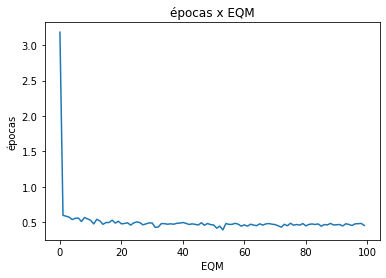

In [6]:
plt.plot(eqm)
plt.title('épocas x EQM')
plt.xlabel('EQM')
plt.ylabel('épocas')
plt.show()

- **Através do gráfico “épocas x EQM” é possível verificar que o algoritmo está “aprendendo” ? Comente.**  
Sim, uma vez que o valor do EQM com o passar de época, ou seja, o erro diminui com os sucessivos ciclos de treinamento

## Método dos mínimos quadrados.

In [69]:
data = np.append(np.ones((47, 1)), df.values, axis=1)
x=data[:,0:3]
y=data[:,3]
np.matmul(np.matmul(np.linalg.pinv(np.matmul(x.T,x)),x.T),y)

array([ 0.8959791 ,  1.39210674, -0.08738019])

Os valores não são iguais pois o algoritmo do gradiente descendente estocástico gera valores aleatórios em toda execução, em contrapartida com o ao utilizando o método dos Mínimos Quadrados, que sempre é fixo.